In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
tx, h_1 = np.linspace(1, 5, 5, retstep=True)
ty, h_2 = np.linspace(3, 7, 5, retstep=True)

In [31]:
X, Y = np.meshgrid(tx, ty, indexing="ij")

In [50]:
def phi(i, j, _X_, _Y_, h_1, h_2):
    
    _tx_ = np.linspace(_X_.min(), _X_.max(), 1000)
    _ty_ = np.linspace(_Y_.min(), _Y_.max(), 1000)
    
    
    xx, yy = np.meshgrid(_tx_, _ty_, indexing="ij")
    
    zz = np.zeros_like(xx)
    
    idx_1 = (xx >= _X_[i-1]) & (xx <= _X_[i]) & \
            (yy >= _Y_[j-1]) & (yy <= _Y_[j])
    
    zz[idx_1] = (1/(h_1*h_2)*(xx-_X_[i-1])*(yy-_Y_[j-1]))[idx_1]
    
    idx_2 = (xx >= _X_[i-1]) & (xx <= _X_[i]) & \
            (yy >= _Y_[j]) & (yy <= _Y_[j+1])
    
    zz[idx_2] = (1/(h_1*h_2)*(xx-_X_[i-1])*(_Y_[j+1]-yy))[idx_2]
    
    
    idx_3 = (xx >= _X_[i]) & (xx <= _X_[i+1]) & \
            (yy >= _Y_[j-1]) & (yy <= _Y_[j])
    
    zz[idx_3] = (1/(h_1*h_2)*(_X_[i+1]-xx)*(yy-_Y_[j-1]))[idx_3]
    
    idx_4 = (xx >= _X_[i]) & (xx <= _X_[i+1]) & \
            (yy >= _Y_[j]) & (yy <= _Y_[j+1])
    
    zz[idx_4] = (1/(h_1*h_2)*(_X_[i+1]-xx)*(_Y_[j+1]-yy))[idx_4]
    
    return xx, yy, zz
    
    

In [53]:
xx, yy, zz = phi(2, 2, tx, ty, h_1, h_2)

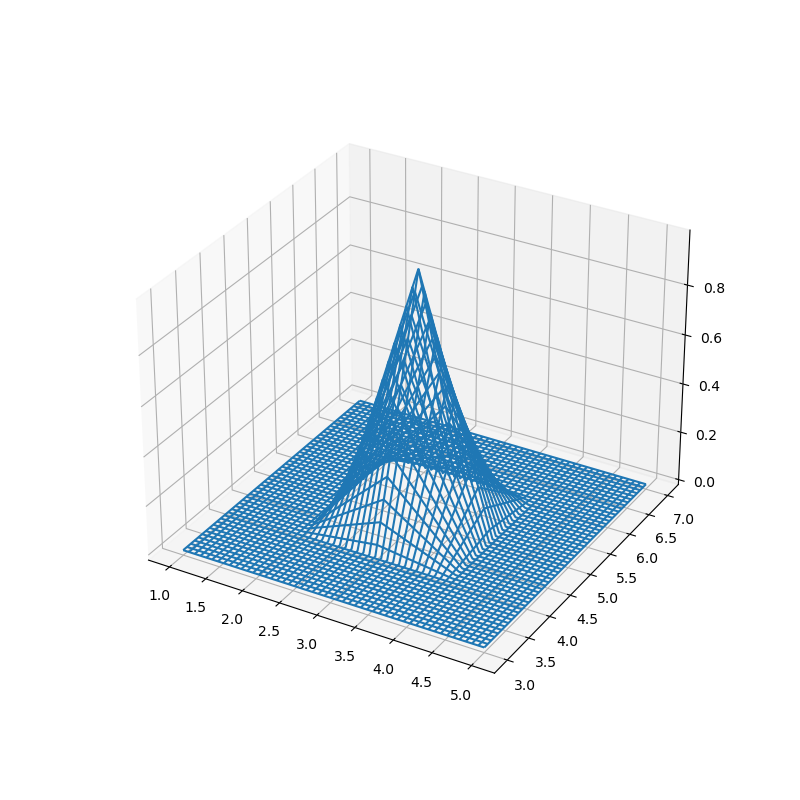

In [60]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_wireframe(xx, yy, zz)